                 Assignment No 11 - Text Mining - Question 2 

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

             Multi-page web-scraping

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


            Looping through multiple pages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass


In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

               Save results to a Dataframe, then export as CSV

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,Reviewed in India on 17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,Reviewed in India on 17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,Reviewed in India on 15 June 2023
5,4.0 out of 5 stars\nGood product,4.0,Good product..,Reviewed in India on 12 June 2023
6,4.0 out of 5 stars\nConcern about Sleeping sensor,4.0,Bluetooth Calling is Awesome btt sometimes its...,Reviewed in India on 18 May 2023
7,3.0 out of 5 stars\nAverage,3.0,Average quality,Reviewed in India on 18 June 2023
8,"3.0 out of 5 stars\nMedicore watch, but could ...",3.0,"First look feel on 10th August : Good packing,...",Reviewed in India on 14 August 2022
9,4.0 out of 5 stars\nSatisfied with the purchase,4.0,Liked the calling feature,Reviewed in India on 10 May 2023


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,15 June 2023
5,4.0 out of 5 stars\nGood product,4.0,Good product..,12 June 2023
6,4.0 out of 5 stars\nConcern about Sleeping sensor,4.0,Bluetooth Calling is Awesome btt sometimes its...,18 May 2023
7,3.0 out of 5 stars\nAverage,3.0,Average quality,18 June 2023
8,"3.0 out of 5 stars\nMedicore watch, but could ...",3.0,"First look feel on 10th August : Good packing,...",14 August 2022
9,4.0 out of 5 stars\nSatisfied with the purchase,4.0,Liked the calling feature,10 May 2023


In [9]:
df.to_csv("BoatSmartWatch_Review.csv")

                 Load Dataset

In [10]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,15 June 2023
5,4.0 out of 5 stars\nGood product,4.0,Good product..,12 June 2023
6,4.0 out of 5 stars\nConcern about Sleeping sensor,4.0,Bluetooth Calling is Awesome btt sometimes its...,18 May 2023
7,3.0 out of 5 stars\nAverage,3.0,Average quality,18 June 2023
8,"3.0 out of 5 stars\nMedicore watch, but could ...",3.0,"First look feel on 10th August : Good packing,...",14 August 2022
9,4.0 out of 5 stars\nSatisfied with the purchase,4.0,Liked the calling feature,10 May 2023


In [11]:
reviews.Rating.describe()

count    10.000000
mean      3.700000
std       0.483046
min       3.000000
25%       3.250000
50%       4.000000
75%       4.000000
max       4.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


In [13]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [14]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,15 June 2023


                   Data Visualization

Date vs Review Count

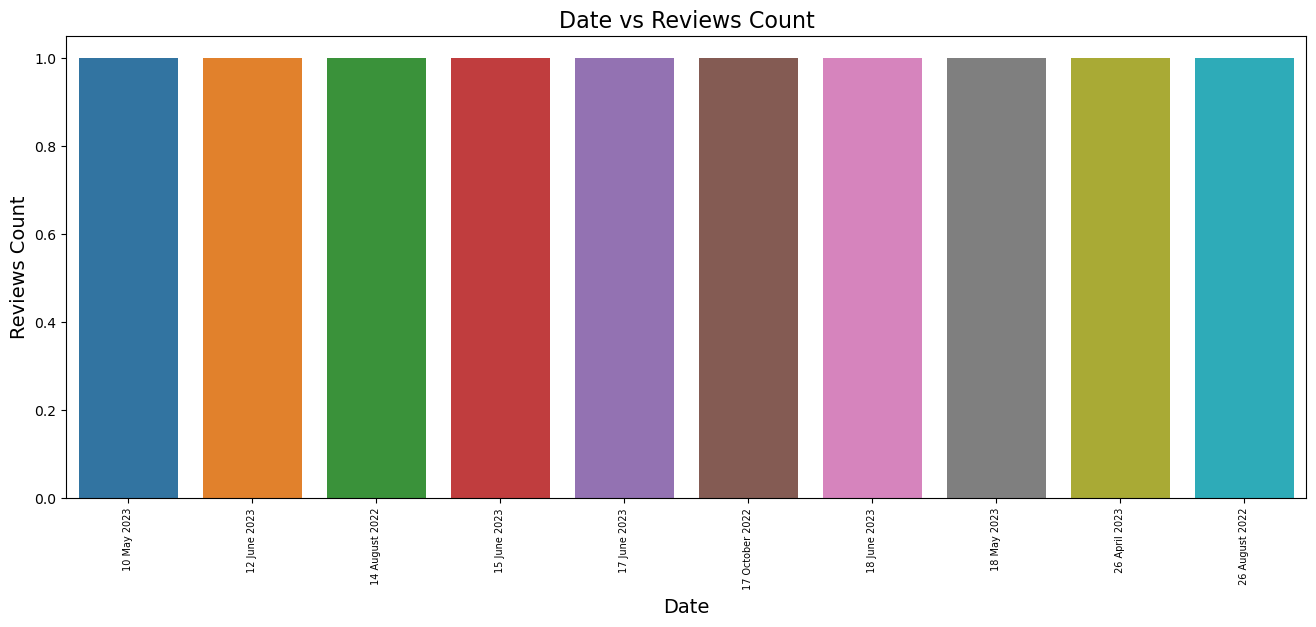

In [16]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

Percentage of Ratings

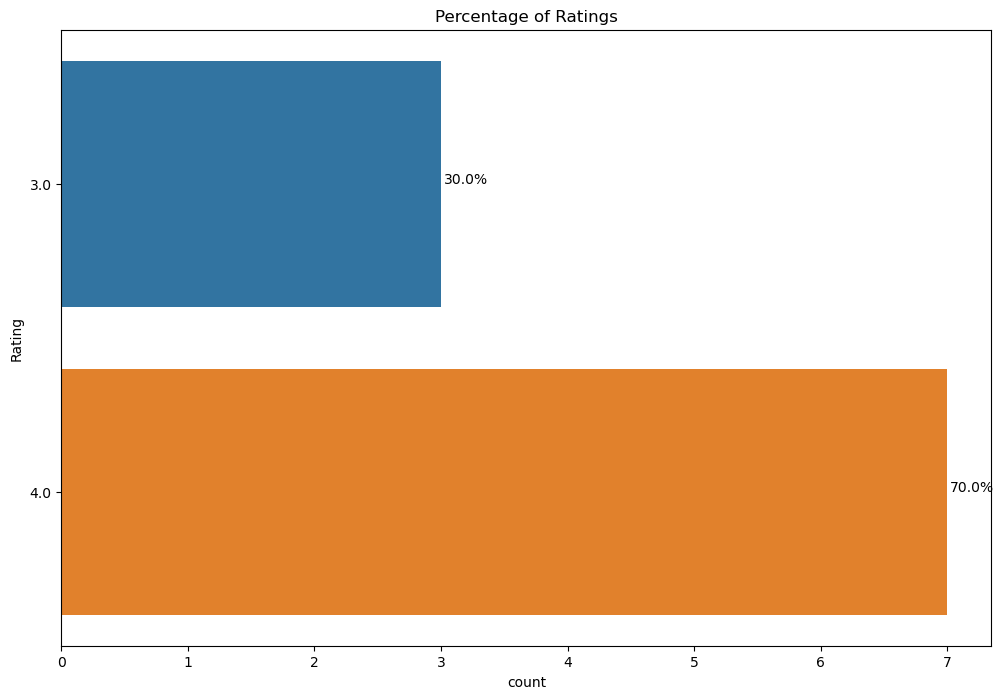

In [17]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

                        BasicText Preprocessing for Sentiment Analysis

Spelling Correction

In [18]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))


0    The media could not be loaded.\n              ...
1    The media could not be loaded.\n              ...
2    The media could not be loaded.\n              ...
3       The quality and features of the watch is good.
4    Product is good. Once Battery charged watch wo...
Name: Review, dtype: object

In [19]:
boat_review = reviews[['Review']]
boat_review

,Review
0,The media could not be loaded.\n ...
1,The media could not be loaded.\n ...
2,The media could not be loaded.\n ...
3,The quality and features of the watch is good.
4,Product is good. Once Battery charged watch wo...
5,Good product..
6,Bluetooth Calling is Awesome btt sometimes its...
7,Average quality
8,"First look feel on 10th August : Good packing,..."
9,Liked the calling feature


In [20]:
boat_review.reset_index(drop=True, inplace=True)

In [21]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

Lemmatizer

In [25]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gujar\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gujar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  0%|          | 0/10 [00:00<?, ?it/s]

In [26]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,quality feature watch good,the quality features watch good.
4,product good battery charged watch work one week,product good. once battery charged watch work ...


Removing '@names'

In [27]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [28]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,quality feature watch good,the quality features watch good.
4,product good battery charged watch work one week,product good. once battery charged watch work ...
5,good product,good product..
6,bluetooth calling awesome btt sometimes get di...,bluetooth calling awesome btt sometimes gets d...
7,average quality,average quality
8,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
9,liked calling feature,liked calling feature


Removing links (http | https)

In [29]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,quality feature watch good,the quality features watch good.
4,product good battery charged watch work one week,product good. once battery charged watch work ...
5,good product,good product..
6,bluetooth calling awesome btt sometimes get di...,bluetooth calling awesome btt sometimes gets d...
7,average quality,average quality
8,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
9,liked calling feature,liked calling feature


Removing Review with empty text

In [30]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,quality feature watch good,the quality features watch good.
4,product good battery charged watch work one week,product good. once battery charged watch work ...
5,good product,good product..
6,bluetooth calling awesome btt sometimes get di...,bluetooth calling awesome btt sometimes gets d...
7,average quality,average quality
8,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
9,liked calling feature,liked calling feature


Dropping duplicate rows

In [31]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,quality feature watch good,the quality features watch good.
4,product good battery charged watch work one week,product good. once battery charged watch work ...
5,good product,good product..
6,bluetooth calling awesome btt sometimes get di...,bluetooth calling awesome btt sometimes gets d...
7,average quality,average quality
8,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
9,liked calling feature,liked calling feature


Function to remove emoji

In [32]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [33]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,quality feature watch good,the quality features watch good.
4,product good battery charged watch work one week,product good. once battery charged watch work ...
5,good product,good product..
6,bluetooth calling awesome btt sometimes get di...,bluetooth calling awesome btt sometimes gets d...
7,average quality,average quality
8,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
9,liked calling feature,liked calling feature


Removing Stop words

In [34]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [35]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [36]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,quality feature watch good,the quality features watch good.
4,product good battery charged watch work one week,product good. once battery charged watch work ...
5,good product,good product..
6,bluetooth calling awesome btt sometimes get di...,bluetooth calling awesome btt sometimes gets d...
7,average quality,average quality
8,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe..."
9,liked calling feature,liked calling feature


Tokenize 'Clean_Reviews'

In [37]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'boat', 'extend', 'pro', 'reviewshyam', 'rajwrite', 'review', 'smartwatch', 'boat', 'extend', 'pro', 'ai', 'language', 'model', 'physical', 'sens', 'interact', 'product', 'like', 'human', 'however', 'based', 'information', 'available', 'provide', 'comprehensive', 'review', 'boat', 'extend', 'pro', 'smartwatch', 'boat', 'extend', 'pro', 'smartwatch', 'designed', 'provide', 'user', 'wide', 'range', 'feature', 'including', 'fitness', 'tracking', 'message', 'call', 'alert', 'music', 'control', 'watch', 'compatible', 'io', 'android', 'device', 'come', 'inch', 'touch', 'display', 'resolution', 'x', 'pixel', 'one', 'key', 'feature', 'boat', 'extend', 'pro', 'long', 'battery', 'life', 'last', 'day', 'single', 'charge', 'making', 'reliable', 'companion', 'fitness', 'enthusiast', 'want', 'track', 'activity', 'without', 'worrying', 'frequent', 'charging', 'watch', 'also', 'come', 'sport', 'mode', 'including', 'running', 'cycling', 'swimming', 'making', 'grea

In [38]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [medium, could, loaded, hello, good, day, fan,...
1    [medium, could, loaded, boat, extend, pro, rev...
2    [medium, could, loaded, got, watch, today, che...
3                      [quality, feature, watch, good]
4    [product, good, battery, charged, watch, work,...
5                                      [good, product]
6    [bluetooth, calling, awesome, btt, sometimes, ...
7                                   [average, quality]
8    [first, look, feel, th, august, good, packing,...
9                            [liked, calling, feature]
Name: Clean_Reviews, dtype: object

In [39]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,..."
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...,"[medium, could, loaded, boat, extend, pro, rev..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che..."
3,quality feature watch good,the quality features watch good.,"[quality, feature, watch, good]"
4,product good battery charged watch work one week,product good. once battery charged watch work ...,"[product, good, battery, charged, watch, work,..."
5,good product,good product..,"[good, product]"
6,bluetooth calling awesome btt sometimes get di...,bluetooth calling awesome btt sometimes gets d...,"[bluetooth, calling, awesome, btt, sometimes, ..."
7,average quality,average quality,"[average, quality]"
8,first look feel th august good packing feel pr...,"first look feel 10th august : good packing, fe...","[first, look, feel, th, august, good, packing,..."
9,liked calling feature,liked calling feature,"[liked, calling, feature]"


Converting words to Stemmer

In [40]:
stemmer = SnowballStemmer("english")

In [41]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,medium could load hello good day fan boat devi...
1,medium could load boat extend pro reviewshyam ...
2,medium could load got watch today check featur...
3,qualiti featur watch good
4,product good batteri charg watch work one week
5,good product
6,bluetooth call awesom btt sometim get disconne...
7,averag qualiti
8,first look feel th august good pack feel premi...
9,like call featur


Converting words to Lemma

In [42]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,medium could loaded hello good day fan boat de...
1,medium could loaded boat extend pro reviewshya...
2,medium could loaded got watch today checked fe...
3,quality feature watch good
4,product good battery charged watch work one week
5,good product
6,bluetooth calling awesome btt sometimes get di...
7,average quality
8,first look feel th august good packing feel pr...
9,liked calling feature


Basic Feature Extaction

Applying bag of Words without N grams

In [43]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [44]:
print(cv.get_feature_names()[109:200])

['display', 'displaying', 'displayits', 'divert', 'done', 'download', 'dp', 'drain', 'echo', 'editing', 'effective', 'either', 'else', 'enable', 'enabled', 'energy', 'enough', 'enthusiast', 'ever', 'excellent', 'except', 'expectation', 'extend', 'extended', 'face', 'facebook', 'fan', 'far', 'feature', 'feedback', 'feel', 'find', 'fine', 'firmware', 'first', 'fitness', 'fix', 'fixed', 'flash', 'flashlight', 'flawlessly', 'food', 'forecast', 'found', 'frequent', 'future', 'gain', 'get', 'getting', 'glitch', 'go', 'going', 'gonna', 'good', 'got', 'great', 'habit', 'hand', 'handed', 'happen', 'health', 'hearing', 'heart', 'hello', 'help', 'hour', 'however', 'human', 'hz', 'ideal', 'im', 'impressive', 'improved', 'inaccuracy', 'inch', 'includes', 'including', 'increase', 'india', 'info', 'information', 'instead', 'interact', 'interface', 'io', 'issue', 'keep', 'key', 'kitchen', 'know', 'lag']


In [45]:
print(cv.get_feature_names()[:100])

['able', 'according', 'accuracy', 'accurate', 'activity', 'add', 'adding', 'addition', 'adjustment', 'affordable', 'afternoon', 'afterwards', 'ahead', 'ai', 'alarm', 'alert', 'allows', 'also', 'always', 'amoled', 'android', 'answer', 'anyone', 'app', 'appfind', 'apps', 'apt', 'around', 'assistant', 'attach', 'attached', 'attended', 'audible', 'audio', 'august', 'available', 'average', 'awesome', 'background', 'based', 'battery', 'best', 'better', 'biggest', 'bluetooth', 'boat', 'bought', 'box', 'bpm', 'brand', 'bright', 'broken', 'bt', 'btt', 'bug', 'bugle', 'build', 'button', 'buying', 'calculate', 'call', 'calling', 'camera', 'cant', 'capability', 'case', 'change', 'charge', 'charged', 'charging', 'checked', 'choice', 'clear', 'click', 'cm', 'come', 'comfortable', 'companion', 'compared', 'compatible', 'comprehensive', 'consider', 'contact', 'continuously', 'control', 'cooked', 'could', 'count', 'crest', 'crystal', 'custom', 'customer', 'customisation', 'customise', 'cycling', 'day',

CountVectorizer with N-grams (Bigrams & Trigrams)

In [49]:
dataframe = dataframe.reset_index(drop=True)

In [50]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [51]:
corpus[3]

'qualiti featur watch good'

Applying Countvectorizer (Creating the Bag of Words model)

In [52]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [53]:
X.shape

(10, 1546)

In [54]:
cv.get_feature_names()[:20]

['abl',
 'abl increas',
 'abl increas decreas',
 'accord',
 'accord need',
 'accord need also',
 'accur',
 'accur record',
 'accur record step',
 'accuraci',
 'accuraci improv',
 'accuraci improv accuraci',
 'accuraci measur',
 'accuraci measur except',
 'accuraci seem',
 'accuraci seem apt',
 'activ',
 'activ overal',
 'activ overal boat',
 'activ without']

In [55]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [56]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,abl,abl increas,abl increas decreas,accord,accord need,accord need also,accur,accur record,accur record step,accuraci,...,worst seen,worst seen smartwatch,worth,worth price,worth price thing,would,would better,would better optionnotif,xtend,xtend pro
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,3,...,1,1,0,0,0,0,0,0,2,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF Vectorizer

In [57]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [58]:
corpus[4]

'product good batteri charg watch work one week'

Applying TF-IDF Vectorizer

In [59]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [60]:
X.shape

(10, 1546)

In [61]:
tfidf_v.get_feature_names()[:20]

['abl',
 'abl increas',
 'abl increas decreas',
 'accord',
 'accord need',
 'accord need also',
 'accur',
 'accur record',
 'accur record step',
 'accuraci',
 'accuraci improv',
 'accuraci improv accuraci',
 'accuraci measur',
 'accuraci measur except',
 'accuraci seem',
 'accuraci seem apt',
 'activ',
 'activ overal',
 'activ overal boat',
 'activ without']

In [62]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [63]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,abl,abl increas,abl increas decreas,accord,accord need,accord need also,accur,accur record,accur record step,accuraci,...,worst seen,worst seen smartwatch,worth,worth price,worth price thing,would,would better,would better optionnotif,xtend,xtend pro
0,0.029961,0.029961,0.029961,0.029961,0.029961,0.029961,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.029961,0.029961,0.029961,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04029,0.04029,0.04029,0.000000,...,0.000000,0.000000,0.04029,0.04029,0.04029,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.139072,...,0.046357,0.046357,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.092714,0.092714
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


Named Entity Recognition (NER)

In [64]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'medium could loaded hello good day fan boat device recently purchased smart watch brand thought put feedback improved possible via software update volume able increase decrease call notification smart watch unable find setting either watch appfind phone option find watch app use gonna vibrate instead using speaker better locating watch rotating dial dial watch rotates right purpose rotating scrolling option button would better optionnotification adding app option notification section available apps using call display option call call display always displaying whomever ever im speaking phone getting notification watch fine second display continuously nearly minute call want watch battery drain unnecessarily also want anyone see speaking left handed pick call left hand time see speaking second enough rather call audio divert pick phone phone voice call audible phone otherwise use picking call phone audio come watch answer call watch ideal time divert audio call watch otherwise make sens

Parts Of Speech (POS) Tagging

In [65]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [66]:
for token in doc_block[:50]:
    print(token,token.pos_)

medium NOUN
could AUX
loaded VERB
hello INTJ
good ADJ
day NOUN
fan NOUN
boat NOUN
device NOUN
recently ADV
purchased VERB
smart ADJ
watch NOUN
brand NOUN
thought VERB
put VERB
feedback NOUN
improved VERB
possible ADJ
via ADP
software NOUN
update NOUN
volume NOUN
able ADJ
increase NOUN
decrease NOUN
call NOUN
notification NOUN
smart ADJ
watch NOUN
unable ADJ
find NOUN
setting VERB
either CCONJ
watch VERB
appfind NOUN
phone NOUN
option NOUN
find VERB
watch VERB
app NOUN
use NOUN
gon VERB
na PART
vibrate VERB
instead ADV
using VERB
speaker NOUN
better ADV
locating VERB


Filtering the nouns and verbs only

In [67]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['come', 'watch', 'answer', 'call', 'watch', 'time', 'divert', 'audio', 'call', 'watch', 'make', 'sense', 'watch', 'face', 'watch', 'face', 'look', 'seems', 'using', 'face', 'watch', 'theme', 'amoled', 'display', 'provide', 'display', 'face', 'watch', 'add', 'option', 'user', 'customise', 'according', 'need', 'provide', 'face', 'watch', 'option', 'display', 'thing', 'done', 'nudge', 'option', 'use', 'optionsnotification', 'panel', 'get', 'notification', 'apps', 'fine', 'attended', 'removed', 'notification', 'phone', 'notification', 'removed', 'watch', 'notification', 'panel', 'staying', 'removing', 'device', 'way', 'remove', 'notification', 'smartwatch', 'stress', 'sensor', 'energy', 'meter', 'calculate', 'stress', 'energy', 'person', 'reason', 'consider', 'show', 'fitness', 'plan', 'want', 'gain', 'weight', 'tell', 'run', 'make', 'sense', 'running', 'going', 'help', 'gain', 'weight', 'dp', 'provides', 'use', 'customer', 'buying', 'watch', 'make', 'use', 'remove']


Counting the noun & verb tokens

In [68]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,35
1,call,14
2,option,11
3,notification,10
4,phone,10
5,feature,10
6,boat,9
7,time,9
8,display,8
9,battery,8


Visualizing results (Barchart for top 10 nouns + verbs)

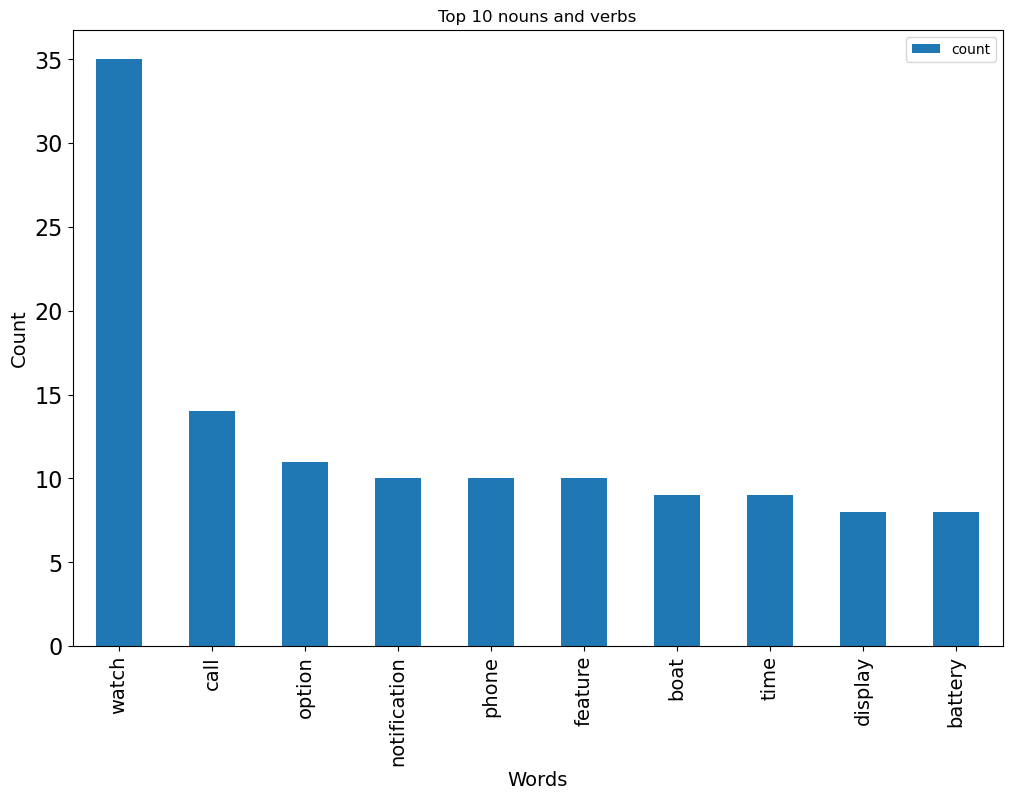

In [69]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


BOW Features

In [70]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

TF-IDF Features

In [71]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

Fetch sentiments Using TextBlob

In [72]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [73]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,9
neg,1


Let's calculate subjectivity and Polarity

In [74]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...,"[medium, could, loaded, boat, extend, pro, rev...",0.467800,0.225170
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325
3,quality feature watch good,the quality features watch good.,"[quality, feature, watch, good]",0.600000,0.700000
4,product good battery charged watch work one week,product good. once battery charged watch work ...,"[product, good, battery, charged, watch, work,...",0.600000,0.700000


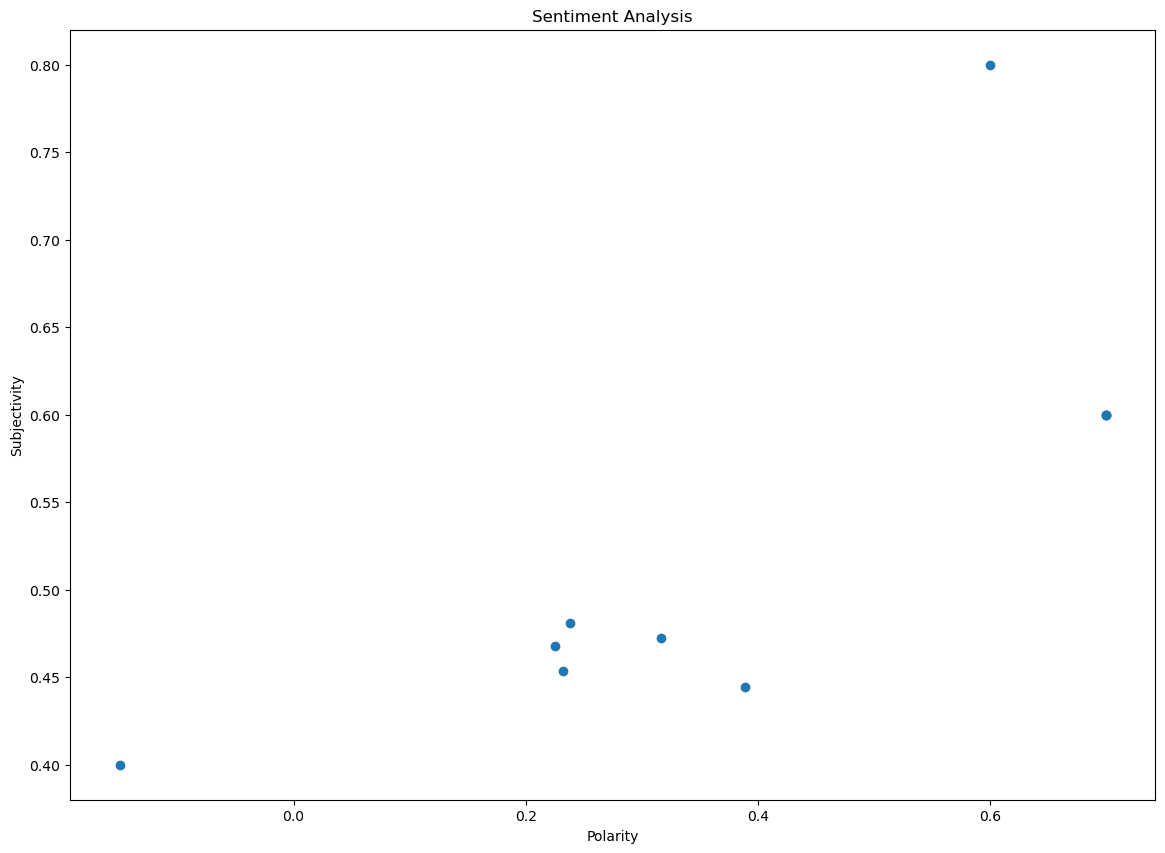

In [75]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [76]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312,pos
1,medium could loaded boat extend pro reviewshya...,the media could loaded. boat extend pro review...,"[medium, could, loaded, boat, extend, pro, rev...",0.467800,0.225170,pos
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325,pos
3,quality feature watch good,the quality features watch good.,"[quality, feature, watch, good]",0.600000,0.700000,pos
4,product good battery charged watch work one week,product good. once battery charged watch work ...,"[product, good, battery, charged, watch, work,...",0.600000,0.700000,pos


Story Generation and Visualization

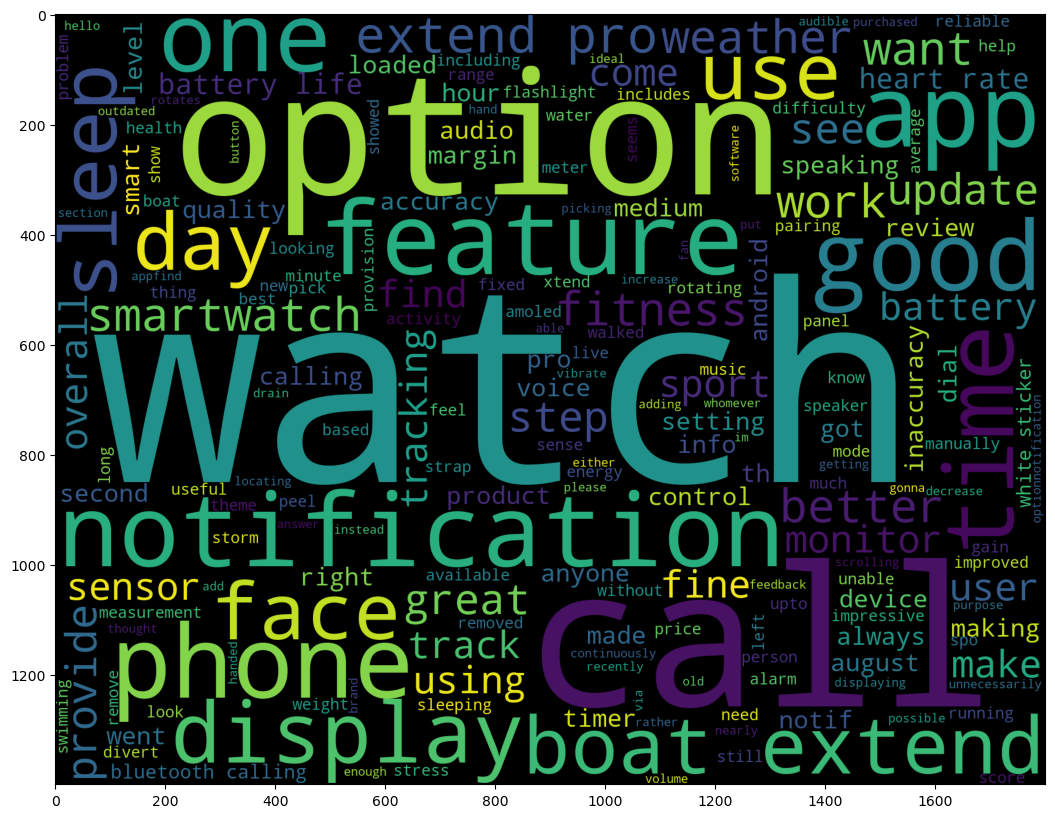

In [77]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

Most common words in positive Review

In [78]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

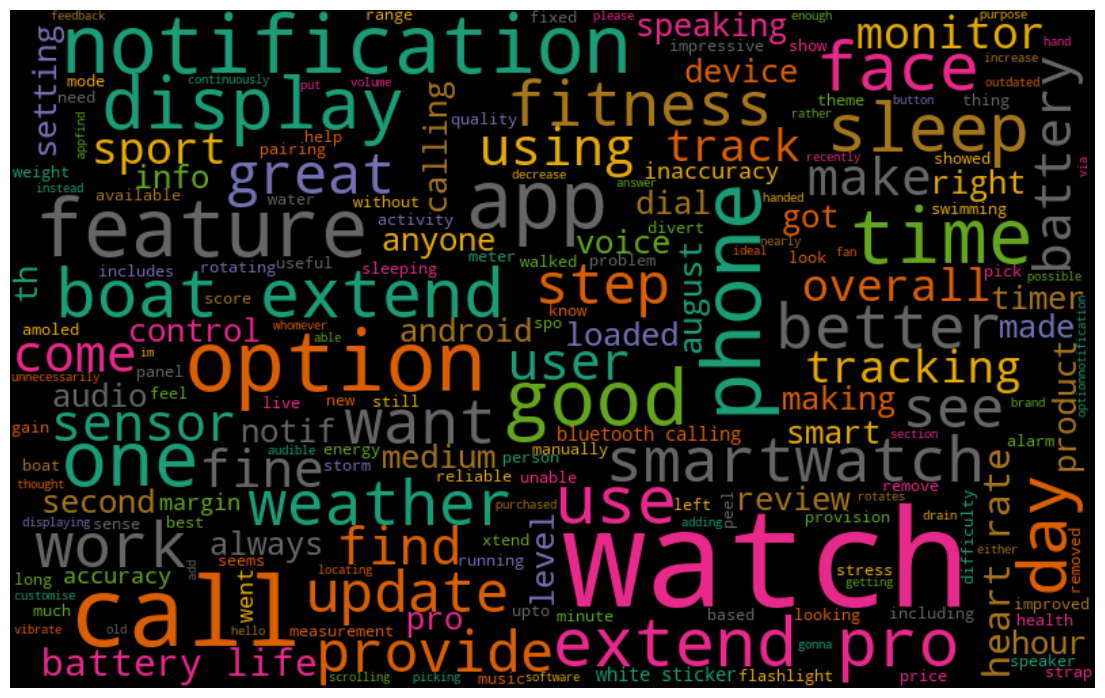

In [79]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

Most common words in negative Review

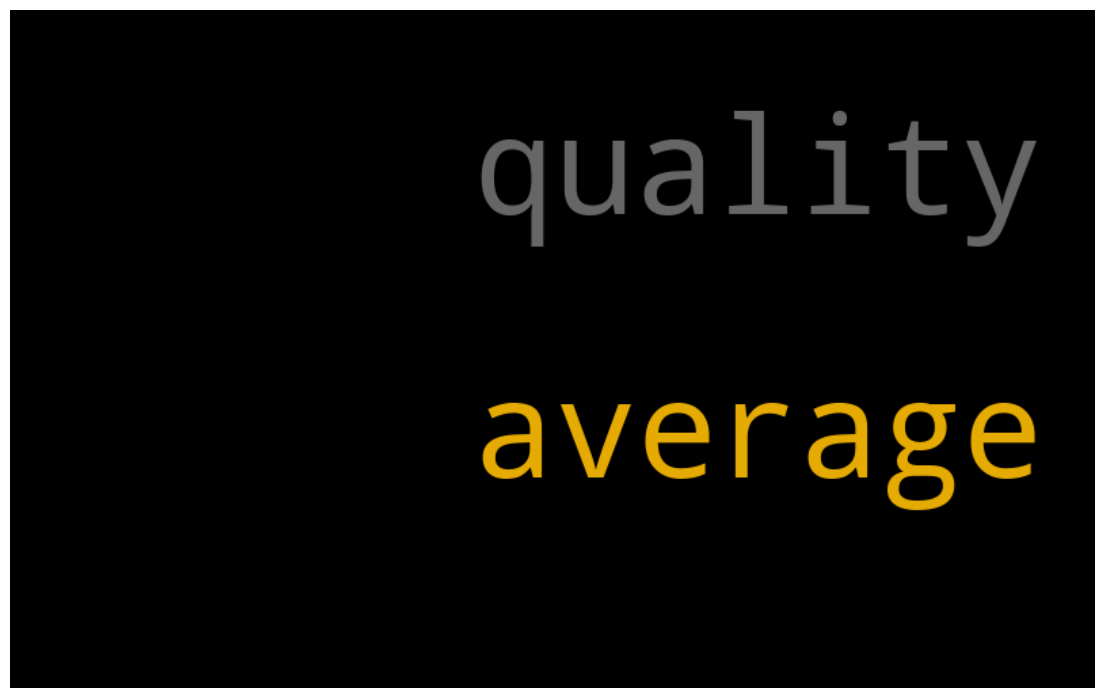

In [80]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)